<a href="https://colab.research.google.com/github/mnzluca/IntroToAI/blob/master/Day%2002/Notebooks/keras_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Nota: Per eseguire sequenzialmente il codice sotto indicato, selezionare il codice qui sotto e premere `MAIUSC + Invio`*

## Installazione e importazione delle librerie


In [ ]:
!pip install keras-segmentation
from keras_segmentation.pretrained import pspnet_50_ADE_20K
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy

     |████████████████████████████████| 3.3MB 4.1MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=af9a9d04f7de1a8352e308560976feca0fd9a1f79034bec811d97735846d41bd
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


## Selezione dell'immagine

Nella cella di codice qui sotto, incollare l'URL di una qualsiasi immagine che si vuole importare e segmentare.

Nota: fare attenzione a incollare l'URL all'interno dei doppi apici ("): la cella deve sempre essere del tipo `url = "url dell'immagine da importare.jpg"`


In [ ]:
url = "https://raw.githubusercontent.com/divamgupta/image-segmentation-keras/master/sample_images/1_input.jpg"


La cella successiva si occupa di effettuare l'importazione dell'immagine prima indicata

In [ ]:
response = requests.get(url)
img = cv2.cvtColor(numpy.array(Image.open(BytesIO(response.content))), cv2.COLOR_RGB2BGR)

Qui sotto è una semplice funzione per mostrare un'immagine all'interno di questo *notebook*


In [ ]:
def view_image(cv2_img):
  return Image.fromarray(cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB))

Ne mostriamo un esempio qui: semplicemente scrivere `view_image(immagine_da_mostrare)` per visualizzarla

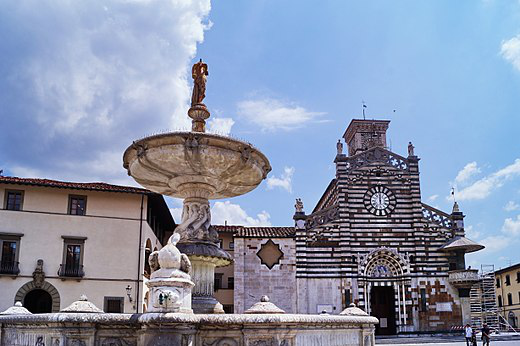

In [ ]:
view_image(img)

## Esecuzione del modello per la segmentazione

qui sotto eseguiamo uno dei modelli pre-addestrati della libreria `keras-segmentation`. Il modello si chiama `pspnet_50_ADE_20K`.

Il modello salverà l'immagine in un file chiamato "out.png"

In [ ]:
model = pspnet_50_ADE_20K() 
out = model.predict_segmentation(inp=img, out_fname="out.png")

Per visualizzare il risultato del modello, carichiamo l'immagine e chiamiamo la funzione `view_image` prima definita

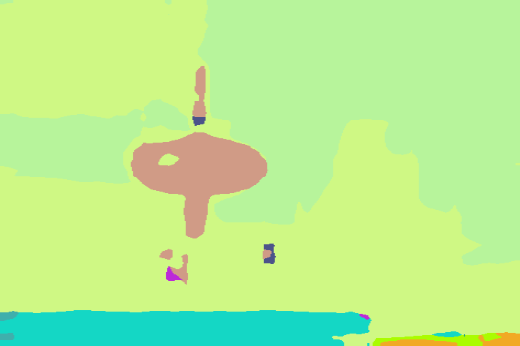

In [ ]:
img_out = cv2.imread("out.png")
view_image(img_out)